In [1]:
import pandas as pd
import pymc as pm
import arviz as az
import numpy as np
from scipy import stats
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

## 3.5 Practice

In [2]:
p_grid = np.linspace(0, 1, 1001)
prior = np.repeat(1, 1001)
likelihood = stats.binom.pmf(6, 9, p_grid)
posterior = likelihood * prior
posterior = posterior / posterior.sum()

In [3]:
np.random.seed(42)
samples = np.random.choice(p_grid, p=posterior, size=10_000, replace=True)

### 3E1
How much posterior probability lies below $p = 0.2$?

0.0014 posterior probability lies below $p = 0.2$.

In [4]:
np.mean(samples < 0.2)

0.0014

### 3E2
How much posterior probability lies above $p = 0.8$?

0.1145 posterior probability lies above $p = 0.8$.

In [5]:
np.mean(samples > 0.8)

0.1145

### 3E3

How much posterior probability lies between $p = 0.2$ and $p = 0.8$?

0.8823 posterior probability lies between $p = 0.2$ and $p = 0.8$.

In [6]:
np.mean((samples > 0.2) & (samples < 0.8))

0.8823

### 3E4

20% of the posterior probability lies below which value of $p$?

20% of the posterior probability lies below $p = 0.514$.

In [7]:
np.percentile(samples, 20)

0.514

### 3E5

20% of the posterior probability lies above which value of $p$?

20% of the posterior probability lies above $p = 0.759$.

In [8]:
np.percentile(samples, 80)

0.759

### 3E6

Which values of $p$ contain the narrowest interval equal to 66% of the posterior probability?

(0.508, 0.78) is the 66% HDI (assuming this is about HDI lol).

In [9]:
az.hdi(samples, hdi_prob=0.66)

array([0.508, 0.78 ])

### 3E7

Which values of $p$ contain 66% of the posterior probability, assuming equal posterior probability both below and above the interval?

In [10]:
np.quantile(samples, [0.17, 0.83])

array([0.497, 0.771])

### 3M1

Suppose the globe tossing data had turned out to be 8 water in 15 tosses. Construct the posterior distribution, using grid approximation. Use the same flat prior as before.

In [11]:
p_grid = np.linspace(0, 1, 1001)
prior = np.repeat(1, 1001)
likelihood = stats.binom.pmf(8, 15, p_grid) # This is the only piece that changes
posterior = likelihood * prior
posterior = posterior / posterior.sum()

### 3M2

Draw 10,000 samples from the grid approximation above. Then use the samples to calculate the 90% HDPI for $p$.

The 90% HDI for $p$ is (0.345, 0.727).

In [12]:
np.random.seed(50)
samples = np.random.choice(p_grid, p=posterior, size=10_000, replace=True)

In [13]:
az.hdi(samples, hdi_prob=0.90)

array([0.345, 0.727])

### 3M3

Construct a posterior predictive check for this model and data. This means simulate the distribution of samples, averaging over the posterior uncertainty of $p$. What is the probability of observing 8 water in 15 tosses?

The probability of observing 8 water in 15 tosses is 0.1506.

In [14]:
posterior_pred_check = stats.binom(n=15, p=samples).rvs(size=10_000)

<AxesSubplot: ylabel='Count'>

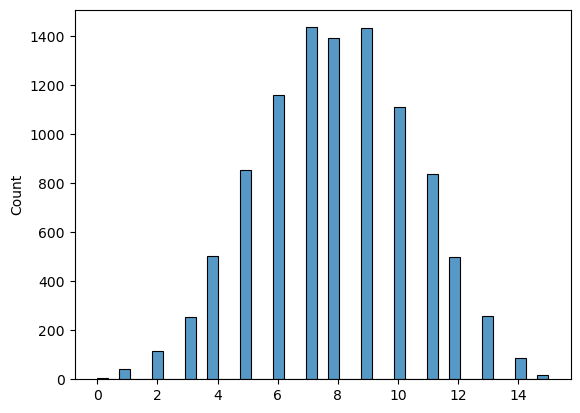

In [15]:
sns.histplot(posterior_pred_check)

In [16]:
np.mean(posterior_pred_check == 8)

0.1393

### 3M4

Using the posterior distribution from the new (8/15) data, now calculate the probability of observing 6 water in 9 tosses.

I think we want to use the posterior as the prior in `stats.binom.pmf()`. Based on what I did, the probability of observing 6 water in 9 tosses is 0.1872.

In [17]:
likelihood = stats.binom.pmf(6, 9, posterior)
posterior = prior * likelihood
posterior = posterior / posterior.sum()

In [18]:
np.random.seed(10)
samples = np.random.choice(p_grid, p=posterior, size=10_000, replace=True)

In [19]:
posterior_pred_check = stats.binom(n=9, p=samples).rvs(size=10_000)

<AxesSubplot: ylabel='Count'>

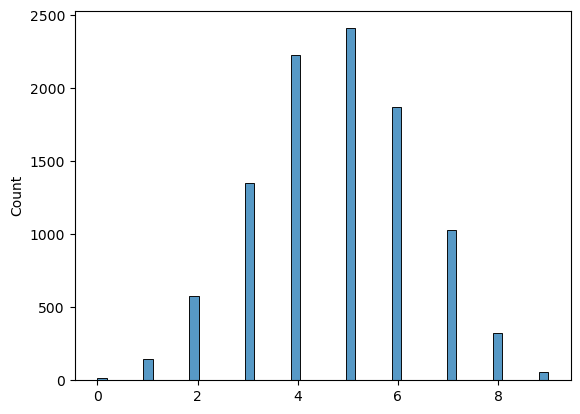

In [20]:
sns.histplot(posterior_pred_check)

In [21]:
np.mean(posterior_pred_check == 6)

0.1872

### 3M5

Start over at 3M1, but now use a prior that is zero below $p = 0.5$ and a constant above $p = 0.5$. This corresponds to prior information that a majority of the Earth's surface is water. Repeat each problem above and compare the inferences. What difference does the better prior make? If it helps, compare inferences (using both priors) to the true value $p = 0.7$.

In [22]:
p_grid = np.linspace(0, 1, 1001)
prior = np.where(p_grid < 0.5, 0, 1)
likelihood = stats.binom.pmf(8, 15, p_grid)
posterior = prior * likelihood
posterior = posterior / posterior.sum()

In [23]:
samples = np.random.choice(p_grid, p=posterior, size=10_000, replace=True)

In [24]:
az.hdi(samples, hdi_prob=0.90)

array([0.5  , 0.712])

In [25]:
posterior_pred_check = stats.binom(n=15, p=samples).rvs(size=10_000)

<AxesSubplot: ylabel='Count'>

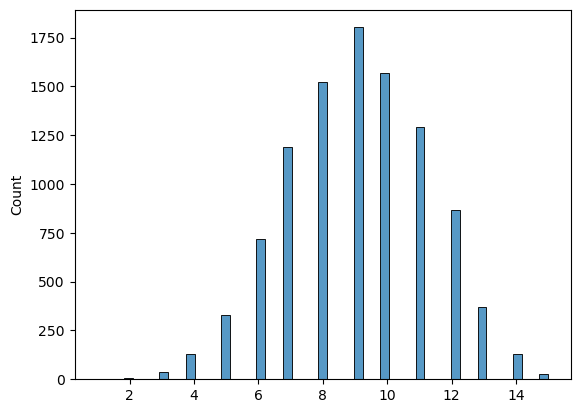

In [26]:
sns.histplot(posterior_pred_check)

In [27]:
np.mean(posterior_pred_check == 8)

0.1523

In [28]:
likelihood = stats.binom.pmf(6, 9, posterior)
posterior = prior * likelihood
posterior = posterior / posterior.sum()

In [29]:
samples = np.random.choice(p_grid, p=posterior, size=10_000, replace=True)

In [30]:
posterior_pred_check = stats.binom(n=9, p=samples).rvs(size=10_000)
np.mean(posterior_pred_check == 6)

0.2168

### 3M6

Suppose you want to estimate the Earth's proportion of water very precisely. Specifically, you want the 99% percentile interval of the posterior distribution of $p$ to be only 0.05 wide. This means the distance between the upper and lower bound of the interval should be 0.05. How many times will you have to toss the glove to do this?

After some playing around, I settled on 2500 globe tosses. **I imagine there has to be a more eloquent way to do this then just tweaking the # of trials.**

In [31]:
p_grid = np.linspace(0, 1, 2501)
prior = np.repeat(1, 2501)
likelihood = stats.binom.pmf(1000, 2500, p_grid)
posterior = prior * likelihood
posterior = posterior / posterior.sum()

In [32]:
np.random.seed(10)
samples = np.random.choice(p_grid, p=posterior, size=10_000, replace=True)

In [33]:
az.hdi(samples, hdi_prob=0.99)

array([0.3736, 0.4244])

### 3H1

Using grid approximation, compute the posterior distribution for the probability of a birth being a boy. Assume a uniform prior probability. Which parameter value maximizes the posterior probability?

In [34]:
birth_1 = np.genfromtxt("birth1.txt")[1:]
birth_2 = np.genfromtxt("birth2.txt")[1:]

In [35]:
# Verify I loaded the data correctly from R
assert np.sum(birth_1) + np.sum(birth_2) == 111

In [36]:
p_grid_birth = np.linspace(0, 1, 1001)
prior = np.repeat(1, 1001)
likelihood = stats.binom.pmf(np.sum(birth_1) + np.sum(birth_2), len(birth_1) + len(birth_2), p_grid_birth)
posterior_boy = prior * likelihood
posterior_boy = posterior_boy / posterior_boy.sum()

In [37]:
posterior_boy_samples = np.random.choice(p_grid_birth, p=posterior_boy, size=10_000, replace=True)

In [38]:
p_grid_birth[np.argmax(posterior_boy)]

0.555

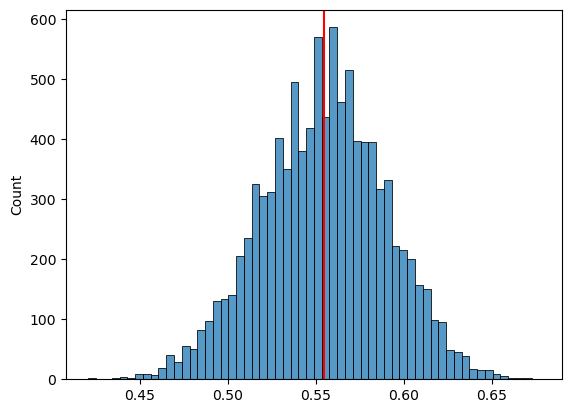

In [39]:
sns.histplot(posterior_boy_samples)
plt.axvline(0.555, color="red")

### 3H2

Using the sample function, draw 10,000 random parameter values from the posterior distribution you calculated above. Use these samples to estimate the 50%, 89%, and 97% highest posterior density intervals.

In [40]:
for hdi in [0.50, 0.89, 0.97]:
    print(f"HDI: {hdi} \n {az.hdi(posterior_boy_samples, hdi_prob=hdi)} \n")

HDI: 0.5 
 [0.532 0.579] 

HDI: 0.89 
 [0.496 0.609] 

HDI: 0.97 
 [0.476 0.628] 



### 3H3

Use `rbinom()` to simulate 10,000 replicates of 200 births. You should end up with 10,000 numbers, each one a count of boys out of 200 births. Compare the distribution of predicted numbers of boys to the actual count in the data (111 boys out of 200 births). There are many good ways to visualize the simulations, but the `dens()` command (part of the `rethinking` package) is probably the easiest way in this case. Does it look like the model fits the data well? That is, does the distribution of predictions include the actual observation as a central, likely outcome?

Based on the posterior predictive check, the mode accurately captures the actual count of 111 boys in the observed data and believes that is is the most likely outcome (although there is some uncertainty in the estimate).

In [41]:
posterior_predictive_births = stats.binom(n=200, p=posterior_boy_samples).rvs(size=10_000)

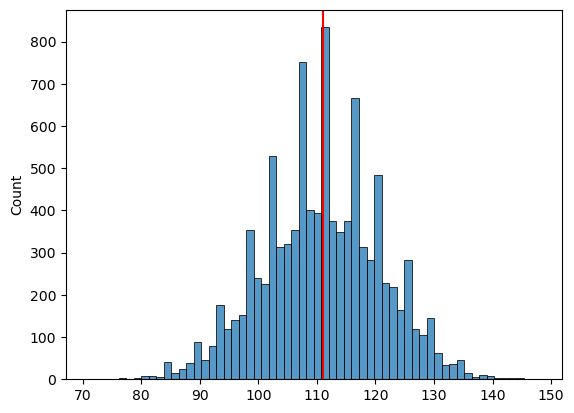

In [46]:
sns.histplot(posterior_predictive_births)
plt.axvline(111, color="red")

## 3H4

Now compare 10,000 counts of boys from 100 simulated first borns only to the number of boys in the first births, `birth1`. How does the model look in this light?

Just looking at first borns, the model is more uncertain about the number of first born boys, with values ranging from [0.35, 0.68].

In [87]:
# So our likelihood is going to change as we're only interested in the first family
likelihood = stats.binom.pmf(np.sum(birth_1), n=birth_1.shape, p=p_grid_birth)
posterior_first_family = prior * likelihood
posterior_first_family = posterior_first_family / posterior_first_family.sum()

In [88]:
first_family_samples = np.random.choice(p_grid_birth, p=posterior_first_family, size=10_000, replace=True)

<AxesSubplot: ylabel='Count'>

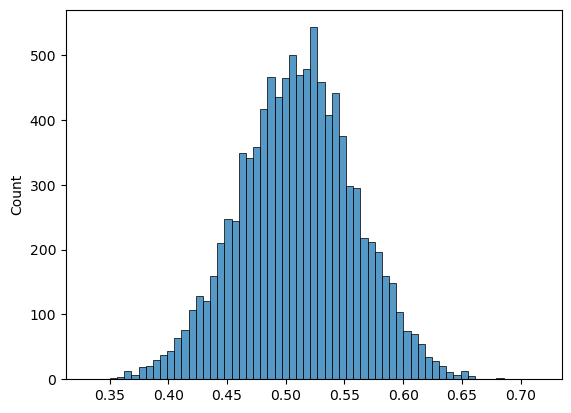

In [119]:
sns.histplot(first_family_samples)

In [89]:
first_family_posterior_predictive_births = stats.binom(n=100, p=first_family_samples).rvs(size=10_000)

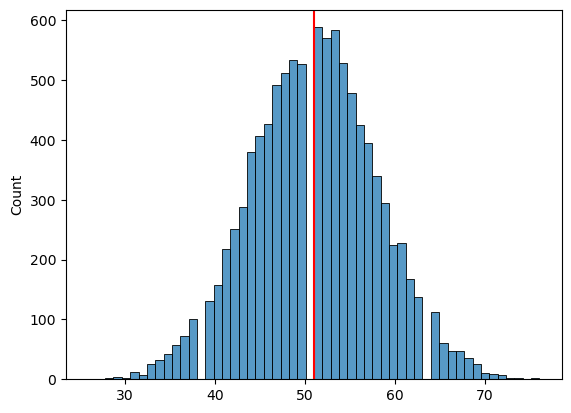

In [90]:
sns.histplot(first_family_posterior_predictive_births)
plt.axvline(np.sum(birth_1), color="red")

## 3H5

The model assumes that sex of first and second births are independent. To check this assumption, focus now on second births that followed female first borns. Compare 10,000 simulated counts of boys to only those second births that followed girls. To do this correctly, you need to count the number of first borns that were girls and simulate that many births, 10,000 times. Compare the counts of boys in your simulations to the actual observed count of boys following girls. How does the model look in this light? Any guesses what is going on in these data?

Based on the sampling of first born girls to births following first born goals, there does seem to be a relationship between the sex of first and second births, namely that if a first born is a girl, the second born is very likely to be a boy.

In [82]:
# Now, we're interested in simulating the number of 1st borns that were girls
likelihood = stats.binom.pmf(birth_1.shape - np.sum(birth_1), n=birth_1.shape, p=p_grid_birth)
posterior_girl = prior * likelihood
posterior_girl = posterior_girl / posterior_girl.sum()

In [83]:
posterior_girl_samples = np.random.choice(p_grid_birth, p=posterior_girl, size=10_000, replace=True)

<AxesSubplot: ylabel='Count'>

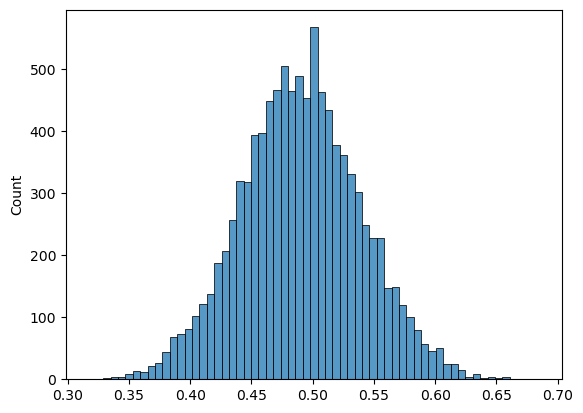

In [84]:
sns.histplot(posterior_girl_samples)

In [107]:
followed_female_first_borns = birth_2[np.where(birth_1 == 0)]
followed_female_first_borns

array([1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.])

In [109]:
likelihood = stats.binom.pmf(np.sum(followed_female_first_borns), n=followed_female_first_borns.shape, p=p_grid_birth)
posterior_births_after_girls = prior * likelihood
posterior_births_after_girls = posterior_births_after_girls / posterior_births_after_girls.sum()

In [110]:
posterior_births_after_girls_samples = np.random.choice(p_grid_birth, p=posterior_births_after_girls, size=10_000, replace=True)

<AxesSubplot: ylabel='Count'>

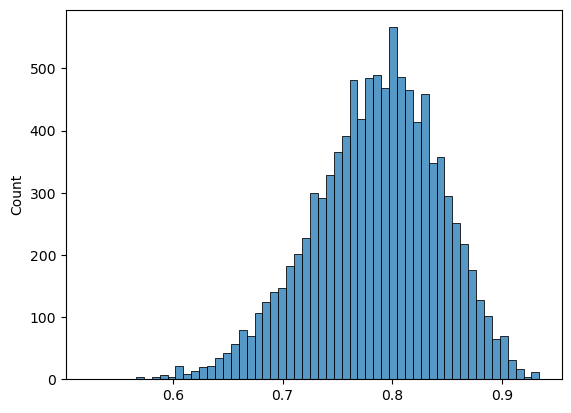

In [111]:
sns.histplot(posterior_births_after_girls_samples)

In [120]:
posterior_pred_births_after_girls = stats.binom(n=followed_female_first_borns.shape, p=posterior_boy_samples).rvs(size=10_000)

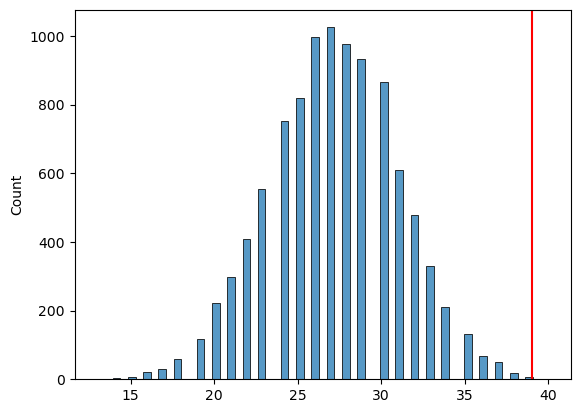

In [121]:
sns.histplot(posterior_pred_births_after_girls)
plt.axvline(np.sum(followed_female_first_borns), color="red")